In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
notebook_path = os.getcwd()
print(notebook_path)


/Users/anastassiatroitskaia/Documents/repositories/BrainStation/BS-capstone/CollegeBasketball-Salaries


In [3]:
players_data=pd.read_csv('/Users/anastassiatroitskaia/Documents/repositories/BrainStation/BS-capstone/CollegeBasketball-Salaries/player_stats_salary_combined.csv')

In [7]:
#players_data.info()

In [9]:
players_data.head()

,Rk,PLAYER,PTS,Draft Team,Round,Pick,Draft Year,Draft College,From,To,...,STANDING REACH,WEIGHT (LBS),WINGSPAN,Lane Agility Time \n(seconds),Shuttle Run \n(seconds),Three Quarter Sprint \n(seconds),Standing Vertical Leap \n(inches),Max Vertical Leap \n(inches),Max Bench Press \n(repetitions),Average Salary
0,521,Paul George,487,IND,1,10,2010,Fresno State,2009-10,2009-10,...,8' 11'',214.4,6' 11.25'',-,-,-,-,-,4,2.055678e+07
1,275,Kawhi Leonard,990,IND,1,15,2011,San Diego State,2009-10,2010-11,...,8' 10'',227.4,7' 3'',11.45,-,3.15,25.5,32,3,1.859980e+07
2,426,John Wall,616,WAS,1,1,2010,Kentucky,2009-10,2009-10,...,8' 5.5'',195.6,6' 9.25'',10.84,-,3.14,30,39,-,1.846550e+07
3,657,Kyrie Irving,192,CLE,1,1,2011,Duke,2010-11,2010-11,...,8' 3'',191,6' 4'',-,-,-,-,-,-,1.828161e+07
4,77,Damian Lillard,1578,POR,1,6,2012,Weber State,2009-10,2011-12,...,7' 11.5'',188.8,6' 7.75'',11.15,-,3.34,34.5,39.5,13,1.821843e+07


#### Basic EDA
1. Non numerical data types needs to be converted to numerical data types
2. fill in missing values / impute or drop
3. histogram for salary
4. distribution of the target


In [12]:
# 1. From / To columns nedds to be converted to date/time datatype
# 2. BODY FAT %                        541 non-null    object/ needs to be float -> drop
# 58  HAND LENGTH (inches)              541 non-null    object -> convert to inches (float)
# 59  HAND WIDTH (inches)               541 non-null    object -> convert to inches (float)
# 60  HEIGHT W/O SHOES                  511 non-null    object -> drop column
# 61  HEIGHT W/ SHOES                   478 non-null    object -> convert to inches (float) 
# 62  STANDING REACH                    511 non-null    object -> convert to inches (float)
# 63  WEIGHT (LBS)                      541 non-null    object -> convert to inches (float)
# 64  WINGSPAN                          512 non-null    object -> convert to inches (float)
#     POS -> drop/ it's a duplicated column


In [14]:
players_data.drop('BODY FAT %', axis=1, inplace=True)

In [16]:
players_data.head()

,Rk,PLAYER,PTS,Draft Team,Round,Pick,Draft Year,Draft College,From,To,...,STANDING REACH,WEIGHT (LBS),WINGSPAN,Lane Agility Time \n(seconds),Shuttle Run \n(seconds),Three Quarter Sprint \n(seconds),Standing Vertical Leap \n(inches),Max Vertical Leap \n(inches),Max Bench Press \n(repetitions),Average Salary
0,521,Paul George,487,IND,1,10,2010,Fresno State,2009-10,2009-10,...,8' 11'',214.4,6' 11.25'',-,-,-,-,-,4,2.055678e+07
1,275,Kawhi Leonard,990,IND,1,15,2011,San Diego State,2009-10,2010-11,...,8' 10'',227.4,7' 3'',11.45,-,3.15,25.5,32,3,1.859980e+07
2,426,John Wall,616,WAS,1,1,2010,Kentucky,2009-10,2009-10,...,8' 5.5'',195.6,6' 9.25'',10.84,-,3.14,30,39,-,1.846550e+07
3,657,Kyrie Irving,192,CLE,1,1,2011,Duke,2010-11,2010-11,...,8' 3'',191,6' 4'',-,-,-,-,-,-,1.828161e+07
4,77,Damian Lillard,1578,POR,1,6,2012,Weber State,2009-10,2011-12,...,7' 11.5'',188.8,6' 7.75'',11.15,-,3.34,34.5,39.5,13,1.821843e+07


In [18]:
#players_data.info()

In [20]:
players_data.drop('HEIGHT W/O SHOES', axis=1, inplace=True)

In [302]:
#players_data.info()

In [24]:
players_data.drop('POS', axis=1, inplace=True)

In [28]:
# revisit converting years played From / To to datetime format 
#players_data['From']=pd.to_datetime(players_data['From'])

In [30]:
players_data.to_csv('players_stats_salary_cleaned.csv', index=False)

In [32]:
# Converting 
# BODY FAT %                        541 non-null    object/ needs to be float -> drop
# 58  HAND LENGTH (inches)              541 non-null    object -> convert to inches (float)
# 59  HAND WIDTH (inches)               541 non-null    object -> convert to inches (float)
# 60  HEIGHfT W/O SHOES                  511 non-null    object -> drop column --> DONE 
# 61  HEIGHT W/ SHOES                   478 non-null    object -> convert to inches (float) 
# 62  STANDING REACH                    511 non-null    object -> convert to inches (float)
# 63  WEIGHT (LBS)                      541 non-null    object -> convert to inches (float)
# 64  WINGSPAN                          512 non-null    object -> convert to inches (float)
# POS -> drop --> DONE

In [34]:
players_data_to_clean=pd.read_csv('/Users/anastassiatroitskaia/Documents/repositories/BrainStation/BS-capstone/CollegeBasketball-Salaries/players_stats_salary_cleaned.csv')

In [36]:
players_data_to_clean.head()

,Rk,PLAYER,PTS,Draft Team,Round,Pick,Draft Year,Draft College,From,To,...,STANDING REACH,WEIGHT (LBS),WINGSPAN,Lane Agility Time \n(seconds),Shuttle Run \n(seconds),Three Quarter Sprint \n(seconds),Standing Vertical Leap \n(inches),Max Vertical Leap \n(inches),Max Bench Press \n(repetitions),Average Salary
0,521,Paul George,487,IND,1,10,2010,Fresno State,2009-10,2009-10,...,8' 11'',214.4,6' 11.25'',-,-,-,-,-,4,2.055678e+07
1,275,Kawhi Leonard,990,IND,1,15,2011,San Diego State,2009-10,2010-11,...,8' 10'',227.4,7' 3'',11.45,-,3.15,25.5,32,3,1.859980e+07
2,426,John Wall,616,WAS,1,1,2010,Kentucky,2009-10,2009-10,...,8' 5.5'',195.6,6' 9.25'',10.84,-,3.14,30,39,-,1.846550e+07
3,657,Kyrie Irving,192,CLE,1,1,2011,Duke,2010-11,2010-11,...,8' 3'',191,6' 4'',-,-,-,-,-,-,1.828161e+07
4,77,Damian Lillard,1578,POR,1,6,2012,Weber State,2009-10,2011-12,...,7' 11.5'',188.8,6' 7.75'',11.15,-,3.34,34.5,39.5,13,1.821843e+07


In [38]:
# Convert above objects and their measurments from feet to inches and change data type to float

def converter_inches(measure):
    """
    Converts measurement from feet and inches to inches.

    Parameters:
    measure (str): String represents measurements that needs to be converted. The measurment is given 
    in format "feet'inches", "feet' inches", "feet".

    Returns: 
    float: Converted value in inches, or None if the input is invalid.

    Example: 
    "6'2"  -> 74.0
    "6' 2" -> 74.0
    "6"    -> 72.0
    ""     -> None
    """
    
    # if pd.isna(measure):
    #     return None

    # value=measure.replace("'", " ").replace("'", '').split()
    # if len(value) == 2:
    #     feet, inches = float(value[0]), float(value[1])
    # elif len(value) ==1:
    #     feet, inches = float(value[0]), 0
    # else:
    #     return None

    # return feet * 12 + inches

    if pd.isna(measure):
        return np.nan
    
    # If measure is already a float, assume it's already in inches
    if isinstance(measure, (float, int)):
        return float(measure)
    
    try:
        measure = str(measure)  # Ensure measure is a string
        value = measure.replace("'", " ").replace('"', '').split()
        if len(value) == 2:
            feet, inches = float(value[0]), float(value[1])
        elif len(value) == 1:
            feet, inches = float(value[0]), 0
        else:
            return np.nan  # Invalid format
        
        return feet * 12 + inches
    except ValueError:
        return np.nan  # Return NaN for any conversion errors


In [ ]:
# Read CSV
players_data_to_clean = pd.read_csv('players_stats_salary_cleaned.csv')
#players_data.to_csv('players_stats_salary_cleaned.csv', index=False)

In [40]:
# Convert columns to inches and float

cols_to_convert = ['HEIGHT W/ SHOES', 'STANDING REACH', 'WINGSPAN']

for column in cols_to_convert:
    players_data_to_clean[column] = players_data_to_clean[column].apply(converter_inches)
    
    # Check for any remaining string values
    non_numeric = players_data_to_clean[players_data_to_clean[column].apply(lambda x: isinstance(x, str))][column]
    if not non_numeric.empty:
        print(f"Warning: The following values in {column} could not be converted:")
        print(non_numeric)
    
    # Convert to float, replacing any remaining non-numeric values with NaN
    players_data_to_clean[column] = pd.to_numeric(players_data_to_clean[column], errors='coerce')


    
# for column in cols_to_convert:
#     players_data = players_data_to_clean[column].apply(converter_inches)
#     players_data = players_data_to_clean[column].astype('float64')

In [305]:
# #players_data_to_clean.head()

# print("First 10 rows of 'HAND WIDTH (inches)':")
# print(players_data_to_clean['HAND WIDTH (inches)'].head(10))


In [45]:
players_data_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rk                                674 non-null    int64  
 1   PLAYER                            674 non-null    object 
 2   PTS                               674 non-null    int64  
 3   Draft Team                        674 non-null    object 
 4   Round                             674 non-null    int64  
 5   Pick                              674 non-null    int64  
 6   Draft Year                        674 non-null    int64  
 7   Draft College                     672 non-null    object 
 8   From                              674 non-null    object 
 9   To                                674 non-null    object 
 10  G                                 674 non-null    int64  
 11  GS                                674 non-null    int64  
 12  MP      

In [47]:
# Converting 'HAND LENGTH (inches)' to correct data type -> float 
# There are missing values in the column as well some of the entries are not just empty but filled with "-"

# Create function -> Add function description
def clean_and_convert(value):
    if pd.isna(value) or value == "-":
        return np.nan
    try:
        return float(value)
    except ValueError:
        return np.nan()

In [49]:
players_data_to_clean['HAND LENGTH (inches)']=players_data_to_clean['HAND LENGTH (inches)'].apply(clean_and_convert)

In [51]:
players_data_to_clean['HAND LENGTH (inches)'] = pd.to_numeric(players_data_to_clean['HAND LENGTH (inches)'])

In [53]:
print(players_data_to_clean['HAND LENGTH (inches)'].describe())
print("\nData type:", players_data_to_clean['HAND LENGTH (inches)'].dtype)
print("\nUnique values:")
print(players_data_to_clean['HAND LENGTH (inches)'].value_counts(dropna=False))

count    510.000000
mean       8.701471
std        0.455239
min        7.500000
25%        8.500000
50%        8.750000
75%        9.000000
max       10.250000
Name: HAND LENGTH (inches), dtype: float64

Data type: float64

Unique values:
HAND LENGTH (inches)
NaN      164
8.50     114
9.00     105
8.75      81
8.25      76
9.25      49
8.00      38
9.50      27
9.75       8
7.50       6
7.75       4
10.00      1
10.25      1
Name: count, dtype: int64


In [55]:
# repeat same steps for 'HAND WIDTH (inches)'
players_data_to_clean['HAND WIDTH (inches)']=players_data_to_clean['HAND WIDTH (inches)'].apply(clean_and_convert)
players_data_to_clean['HAND WIDTH (inches)'] = pd.to_numeric(players_data_to_clean['HAND WIDTH (inches)'])

In [57]:
print(players_data_to_clean['HAND WIDTH (inches)'].describe())
print("\nData type:", players_data_to_clean['HAND WIDTH (inches)'].dtype)
print("\nUnique values:")
print(players_data_to_clean['HAND WIDTH (inches)'].value_counts(dropna=False))

count    510.000000
mean       9.374510
std        0.687695
min        7.250000
25%        9.000000
50%        9.250000
75%        9.750000
max       11.750000
Name: HAND WIDTH (inches), dtype: float64

Data type: float64

Unique values:
HAND WIDTH (inches)
NaN      164
9.00      79
9.50      78
9.25      66
10.00     54
9.75      48
8.75      47
8.50      43
10.25     27
10.50     23
8.25      18
10.75      7
11.00      7
7.50       3
7.75       3
11.25      2
8.00       2
11.75      1
7.25       1
11.50      1
Name: count, dtype: int64


In [61]:
players_data_to_clean.to_csv('players_stats_salary_cleaned.csv', index=False)

In [63]:
# repeat same steps for 'WEIGHT (LBS)'
players_data_to_clean['WEIGHT (LBS)']=players_data_to_clean['WEIGHT (LBS)'].apply(clean_and_convert)
players_data_to_clean['WEIGHT (LBS)'] = pd.to_numeric(players_data_to_clean['WEIGHT (LBS)'])

In [65]:
print(players_data_to_clean['WEIGHT (LBS)'].describe())
print("\nData type:", players_data_to_clean['WEIGHT (LBS)'].dtype)
print("\nUnique values:")
print(players_data_to_clean['WEIGHT (LBS)'].value_counts(dropna=False))

count    509.000000
mean     212.721218
std       23.134882
min      149.200000
25%      195.200000
50%      211.000000
75%      229.000000
max      302.600000
Name: WEIGHT (LBS), dtype: float64

Data type: float64

Unique values:
WEIGHT (LBS)
NaN      165
221.8      5
226.6      5
223.8      5
194.6      4
        ... 
214.8      1
227.2      1
217.4      1
186.3      1
206.0      1
Name: count, Length: 305, dtype: int64


In [67]:
#players_data_to_clean.drop('Max Bench Press\n(repetitions)', inplace=True)

In [308]:
#players_data_to_clean.info()

Still left to convert. Having issues with converting those columns. 
- 1. Lane Agility Time          (seconds)      object 
- 2. Shuttle Run                (seconds)      object 
- 3. Three Quarter Sprint       (seconds)      object 
- 4. Standing Vertical Leap     (inches)       object 
- 5. Max Vertical Leap          (inches)       object 
- 6. Max Bench Press            (repetitions)  object 

In [72]:
# 1. Converting first three to float 
cols_to_float = [
    'Lane Agility Time \n(seconds)',
    'Shuttle Run \n(seconds)',
    'Three Quarter Sprint \n(seconds)'
]

for col in cols_to_float:
    players_data_to_clean[col] = players_data_to_clean[col].apply(clean_and_convert)

In [74]:
# players_data_to_clean.info()

In [76]:
leap_columns = [
    'Standing Vertical Leap \n(inches)',
    'Max Vertical Leap \n(inches)'
]

for col in leap_columns:
    players_data_to_clean[col] = players_data_to_clean[col].apply(clean_and_convert)

In [78]:
#players_data_to_clean.head()

In [80]:
players_data_to_clean['Max Bench Press \n(repetitions)']=players_data_to_clean['Max Bench Press \n(repetitions)'].apply(clean_and_convert)

In [82]:
#players_data_to_clean.info()

#### All columns data types were converted to numerical values (float64, int64)
- "From", "To", "Draft Year" columns are the only two left that I need to get back to.
- Draft Team object -> needs to be encoded
- Draf College object -> needs to be encoded

  #### Next Steps
  - Checking for missing, duplicated values
  - Look at the distribution of the targer 

In [85]:
# 1st save cleaned df again
players_data_to_clean.to_csv('players_stats_salary_cleaned.csv', index=False)

In [87]:
# Some columns names very long and dificult to work with. Had an issue when I was doing conversion and 
# had to write those columns 
# Columns names to convert 
# 'Lane Agility Time \n(seconds)'       -> Lane Agility t
# 'Shuttle Run \n(seconds)'             -> Shuttle Run
# 'Three Quarter Sprint \n(seconds)'    -> 3 Quarter Sprint
# 'Standing Vertical Leap \n(inches)'   -> Standing Ver Leap
# 'Max Vertical Leap \n(inches)'        -> Max Ver Leap
# 'Max Bench Press \n(repetitions)'     -> Max Bench Press
# 'HAND LENGTH (inches)'                -> Hand Length
# 'HAND WIDTH (inches)                  -> Hand Width 
# 'HEIGHT W/ SHOES'                     -> Height w/shoes
# STANDING REACH                        -> Standing Reach
# WEIGHT (LBS)                          -> Weight (lbs)
# WINGSPAN                              -> Wingspan
# PLAYER                                -> Player

In [89]:
players_data_to_clean.rename(columns={'Lane Agility Time \n(seconds)': 'Lane Agility t', 
                                    'Shuttle Run \n(seconds)': 'Shuttle Run (sec)',
                                    'Three Quarter Sprint \n(seconds)': '3 Quarter Sprint',
                                    'Standing Vertical Leap \n(inches)': 'Standing Ver Leap',
                                    'Max Vertical Leap \n(inches)': 'Max Ver Leap',
                                    'Max Bench Press \n(repetitions)': 'Max Bench Press',
                                    'HAND LENGTH (inches)': 'Hand Length',
                                    'HAND WIDTH (inches)': 'Hand Width',
                                    'HEIGHT W/ SHOES': 'Height w/shoes',
                                    'STANDING REACH': 'Stnading Reach',
                                    'WEIGHT (LBS)': 'Weight (lbs)',
                                    'WINGSPAN': 'Wingspan',
                                    'PLAYER': 'Player'},inplace=True)

In [91]:
# players_data_to_clean.info()

In [93]:
# Check for duplicates
duplicates=players_data_to_clean[players_data_to_clean.duplicated(subset=['Player'], keep=False)]

if duplicates.empty:
    print("No duplicates found")
else:
    print(f"Found {len(duplicates)} duplicated rows:")
    print(duplicates[['Player', 'Team', 'Draft Year']])

No duplicates found


In [95]:
nan_counts=players_data_to_clean.isna().sum()
print(nan_counts)

Rk                     0
Player                 0
PTS                    0
Draft Team             0
Round                  0
                    ... 
3 Quarter Sprint     258
Standing Ver Leap    255
Max Ver Leap         254
Max Bench Press      423
Average Salary        80
Length: 69, dtype: int64


In [97]:
players_data_to_clean.isna().sum().sum()

3140

In [99]:
nan_percentages = players_data_to_clean.isna().mean() * 100
print(nan_percentages)

Rk                    0.000000
Player                0.000000
PTS                   0.000000
Draft Team            0.000000
Round                 0.000000
                       ...    
3 Quarter Sprint     38.278932
Standing Ver Leap    37.833828
Max Ver Leap         37.685460
Max Bench Press      62.759644
Average Salary       11.869436
Length: 69, dtype: float64


In [101]:
# Had some issues with that plot
from textwrap import wrap
# https://docs.python.org/3/library/textwrap.html 
# Had to get some help from chat gpt on this funciton and plotting

# Visual for % of nan's -> Add funciton description
def plot_nan_percentages(df, threshold=0.3):
    # Calculate percentage of NaN values
    nan_percentages = df.isna().mean() * 100

    # Filter columns with NaN percentages higher than the threshold
    nan_percentages_filtered = nan_percentages[nan_percentages > threshold]
    # Sort percentages in descending order
    nan_percentages_sorted = nan_percentages.sort_values(ascending=False)

    # Plot 
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.barplot(x=nan_percentages_sorted.index, y=nan_percentages_sorted.values, ax=ax)
    
    plt.title(f'Percentage of NaN Values by Column (>{threshold}%)', fontsize=16, )
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of NaN Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Wrap long column names -> had a lot of issue with this 
    wrapped_labels = ['\n'.join(wrap(label, 25)) for label in nan_percentages_sorted.index]
    ax.set_xticklabels(wrapped_labels)
    
    # Percentage labels on top of each bar
    for i, v in enumerate(nan_percentages_sorted.values):
        ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', rotation=90)
    
    plt.tight_layout()
    plt.show()


/var/folders/qq/dd69bmtd1cqbssx3mj0r8xjh0000gn/T/ipykernel_69961/3561121594.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


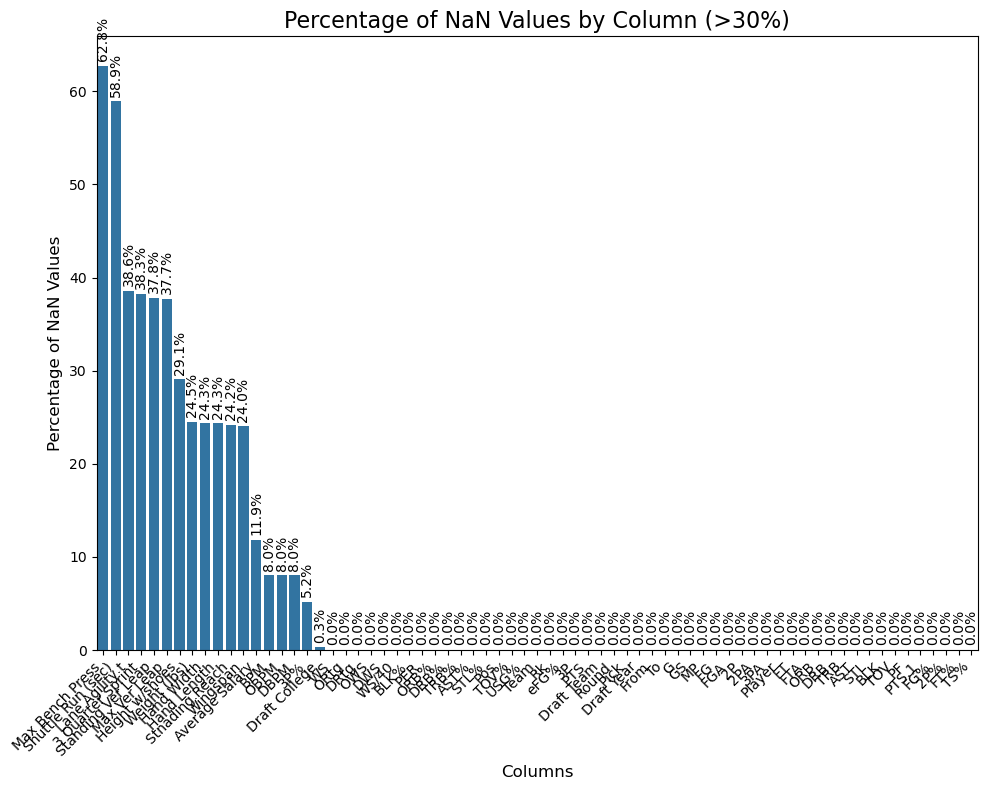

In [103]:
plot_nan_percentages(players_data_to_clean, threshold=30)

#### NaN values
- the number of nan values in Max Bench Press and Shuttle Run are very high. After more research on those two characteristics Max Bench Press 

#### NaN values
- the number of nan values in Max Bench Press and Shuttle Run are very high. According to a recent article published by journal of Sports Medicine "A Systematic Review on Fitness Testing in Adult Male Basketball Players: Tests Adopted, Characteristics Reported and Recommendations for Practice" there was only one research paper out of 1309 studies that mentions Max Bench Press characteristic. So I decided to drop that column.
- Shuttle Run

In [107]:
players_data_to_clean.drop(columns=['Max Bench Press', 'Shuttle Run (sec)'], inplace=True)

In [310]:
#players_data_to_clean.info()

In [111]:
players_data_to_clean.to_csv('players_stats_salary_cleaned.csv', index=False)

/var/folders/qq/dd69bmtd1cqbssx3mj0r8xjh0000gn/T/ipykernel_69961/3561121594.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


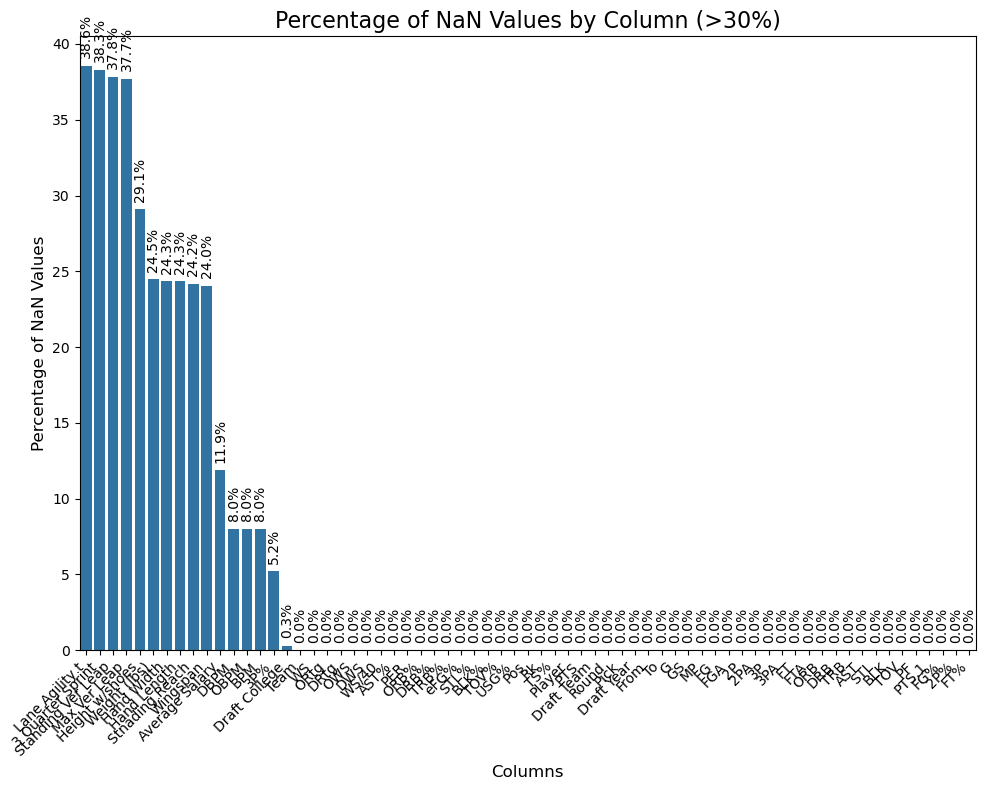

In [113]:
plot_nan_percentages(players_data_to_clean, threshold=30)

#### Taking care of NaN values:
- for all the Nan values im going to do imputation
- Since 'Averagy Salary' is one of the most important columns for my work and it missing 80 values I'm going to come back to it and try to gather missing data. But before I do that I want to check the distribution of it. So will just impute NaN values for now.
- Same will be done for other columns that are missing values


In [116]:
null_values= players_data_to_clean.isnull().sum()
cols_with_missing_val = null_values[null_values > 0]

In [118]:
print(cols_with_missing_val)

Draft College          2
3P%                   35
OBPM                  54
DBPM                  54
BPM                   54
Hand Length          164
Hand Width           164
Height w/shoes       196
Stnading Reach       163
Weight (lbs)         165
Wingspan             162
Lane Agility t       260
3 Quarter Sprint     258
Standing Ver Leap    255
Max Ver Leap         254
Average Salary        80
dtype: int64


In [120]:
# 'Draft College' column is mising only 2 values -> probaly can try and fill those in 
# To find values that are missing
missing_draft_college = players_data_to_clean[players_data_to_clean['Draft College'].isnull()]

if missing_draft_college.empty:
    print("There are no missing values in the 'Draft College' column.")
else:
    print(f"There are {len(missing_draft_college)} rows with missing 'Draft College' values:")
    print(missing_draft_college[['Player', 'Draft Team', 'Draft Year', 'Draft College']])

There are 2 rows with missing 'Draft College' values:
           Player Draft Team  Draft Year Draft College
468  Jonah Bolden        PHI        2017           NaN
601    Ater Majok        LAL        2011           NaN


In [122]:
players_data_to_clean.loc[players_data_to_clean['Player'] == 'Jonah Bolden', 'Draft College'] = 'UCLA'


In [124]:
players_data_to_clean.loc[players_data_to_clean['Player'] == 'Ater Majok', 'Draft College'] = 'Connecticut'

In [126]:
# Check if 'Draft College' for the players was added
missing_draft_college = players_data_to_clean[players_data_to_clean['Draft College'].isnull()]

if missing_draft_college.empty:
    print("There are no missing values in the 'Draft College' column.")
else:
    print(f"There are {len(missing_draft_college)} rows with missing 'Draft College' values:")
    print(missing_draft_college[['Player', 'Draft Team', 'Draft Year', 'Draft College']])

There are no missing values in the 'Draft College' column.


In [128]:
# Saving df
players_data_to_clean.to_csv('players_stats_salary_cleaned.csv', index=False)

In [130]:
null_values= players_data_to_clean.isnull().sum()
cols_with_missing_val = null_values[null_values > 0]

In [132]:
print(cols_with_missing_val)

3P%                   35
OBPM                  54
DBPM                  54
BPM                   54
Hand Length          164
Hand Width           164
Height w/shoes       196
Stnading Reach       163
Weight (lbs)         165
Wingspan             162
Lane Agility t       260
3 Quarter Sprint     258
Standing Ver Leap    255
Max Ver Leap         254
Average Salary        80
dtype: int64


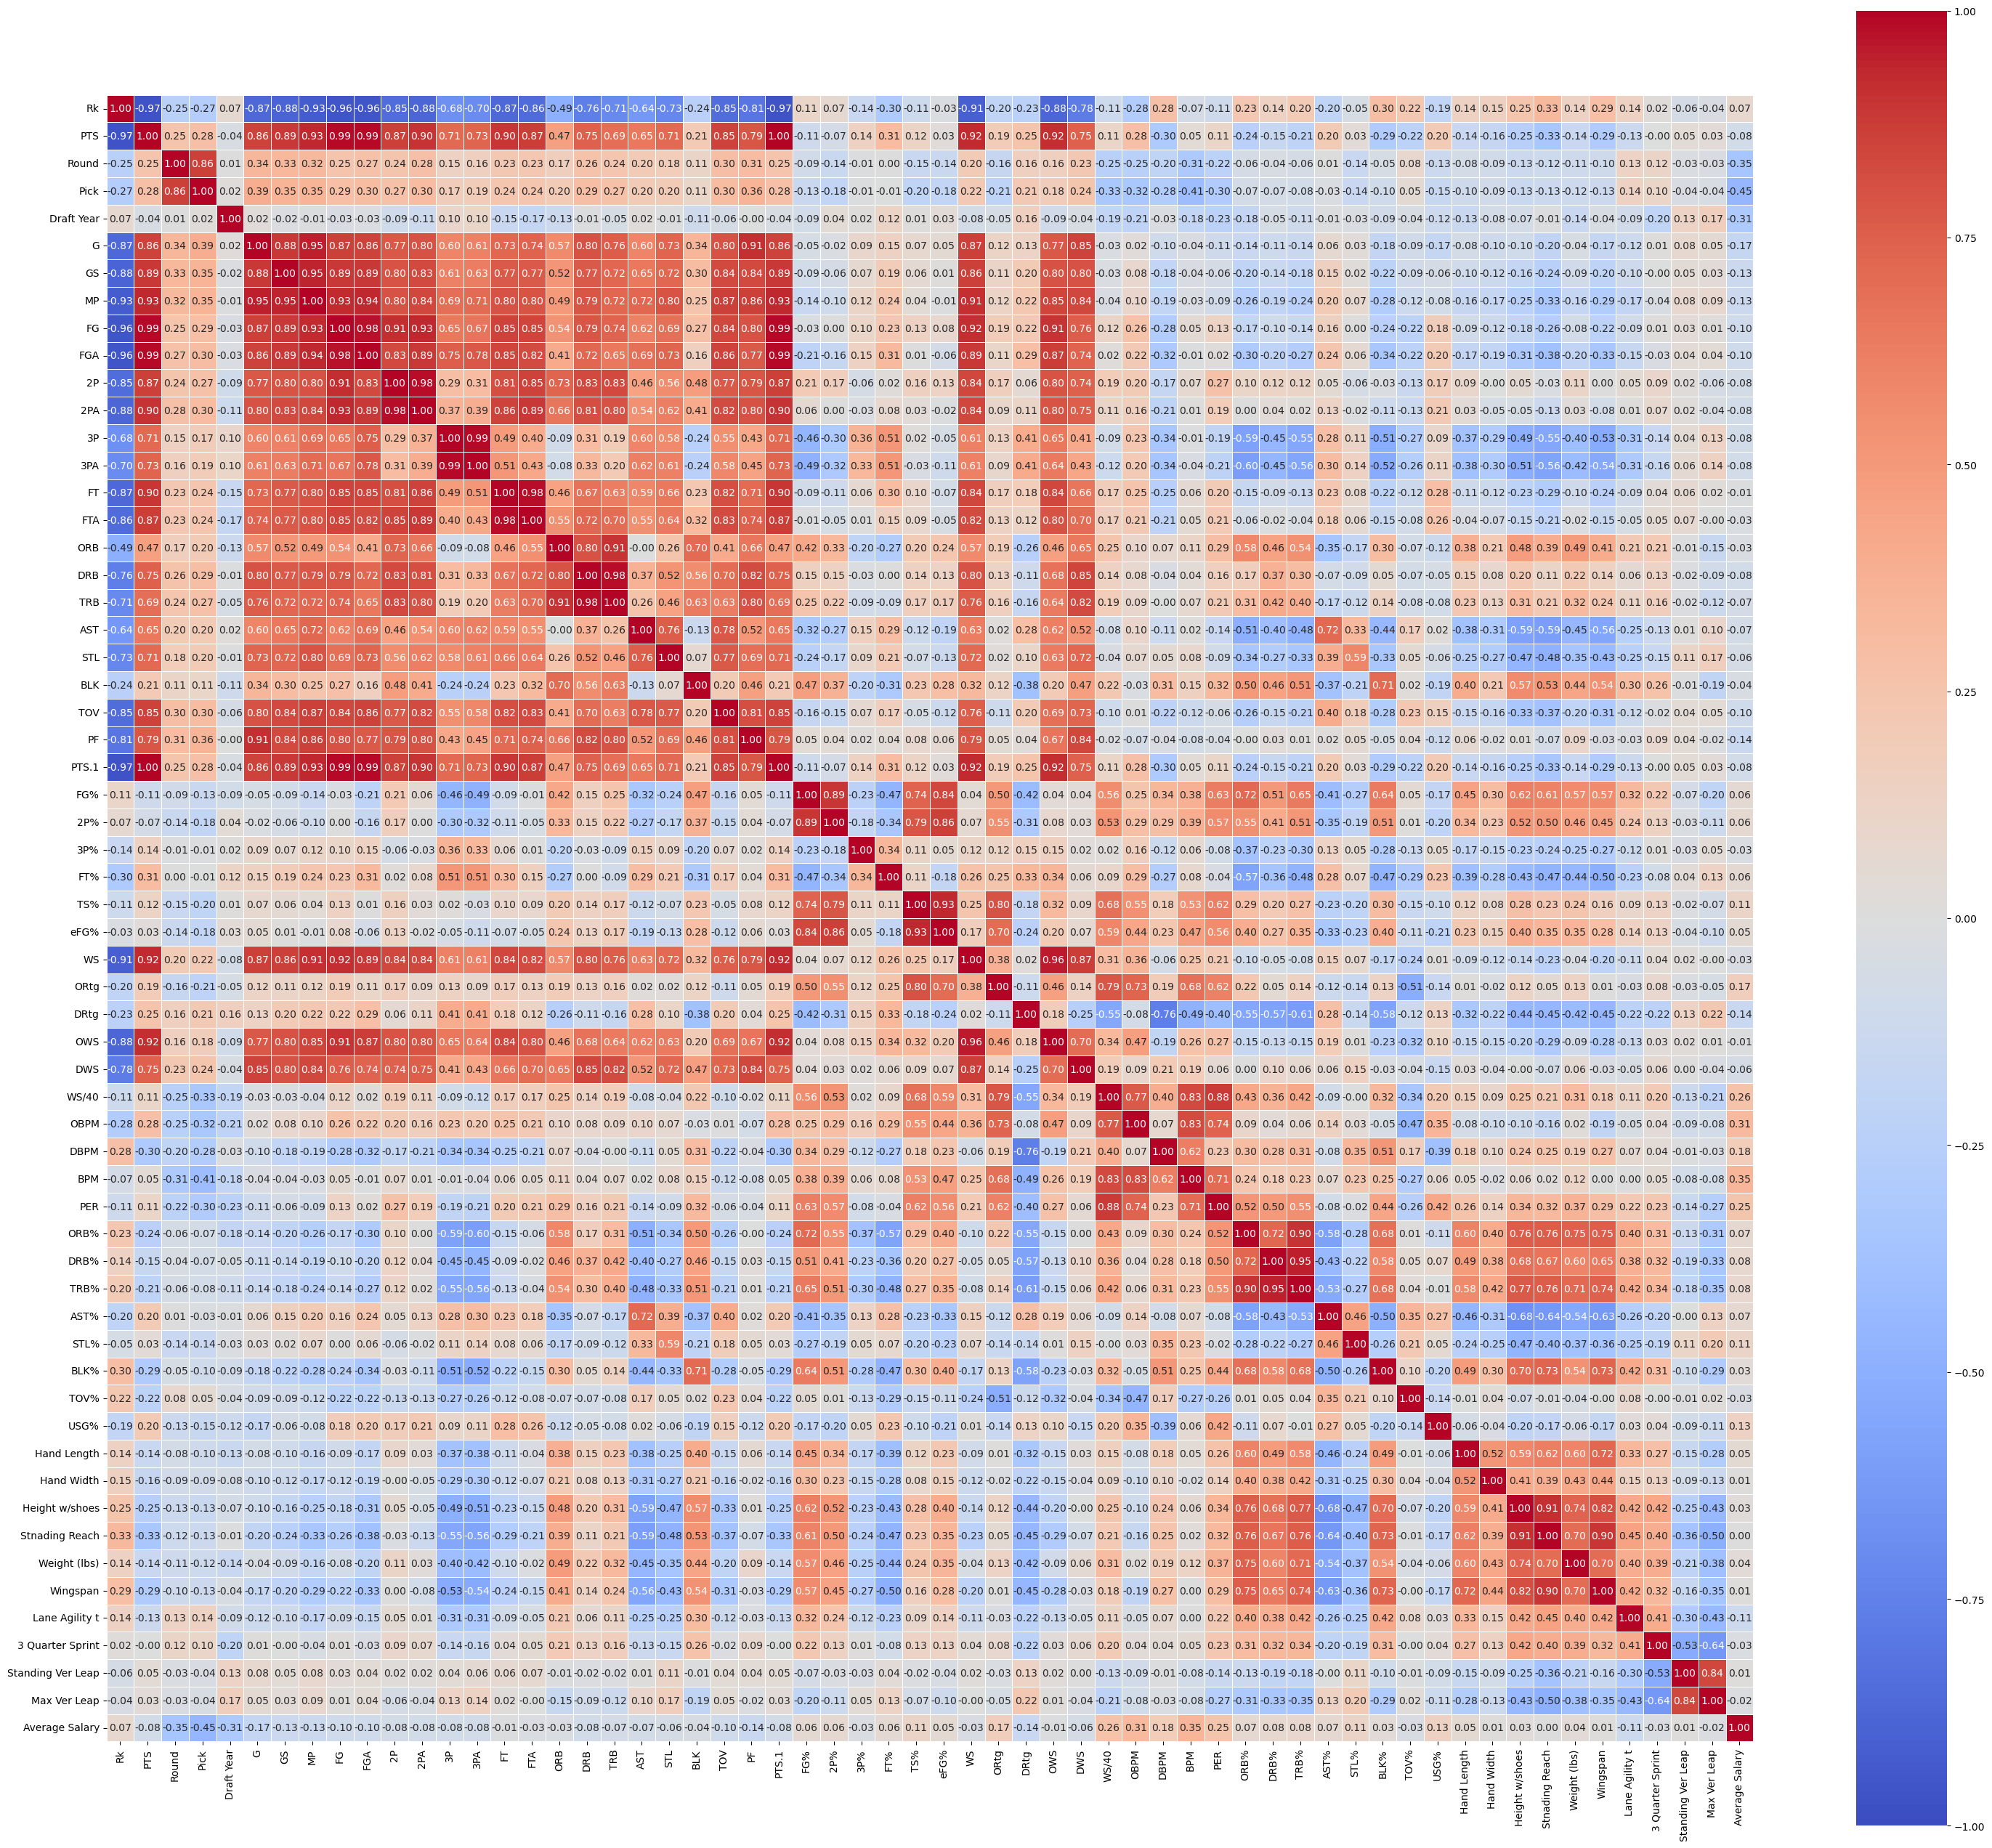

In [134]:
correlation_matrix=players_data_to_clean.corr(numeric_only=True)

plt.figure(figsize=(30, 26))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot=True,
            center=0,  # Center the colormap at 0
            square=True,  # Make sure the cells are square
            linewidths=0.5,  # Add lines between cells
            fmt='.2f')  # Form)
plt.tight_layout()
plt.show()


In [135]:
correlation = correlation_matrix.loc['Draft Year', 'Average Salary']
print(f"Correlation between Draft Year and Average Salary: {correlation:.2f}")

Correlation between Draft Year and Average Salary: -0.31


In [136]:
# The above heatmap is not very helpful 

In [137]:
# Next step is to figure out a better plot to see if imputing based on the 'Draft Year' make sense 

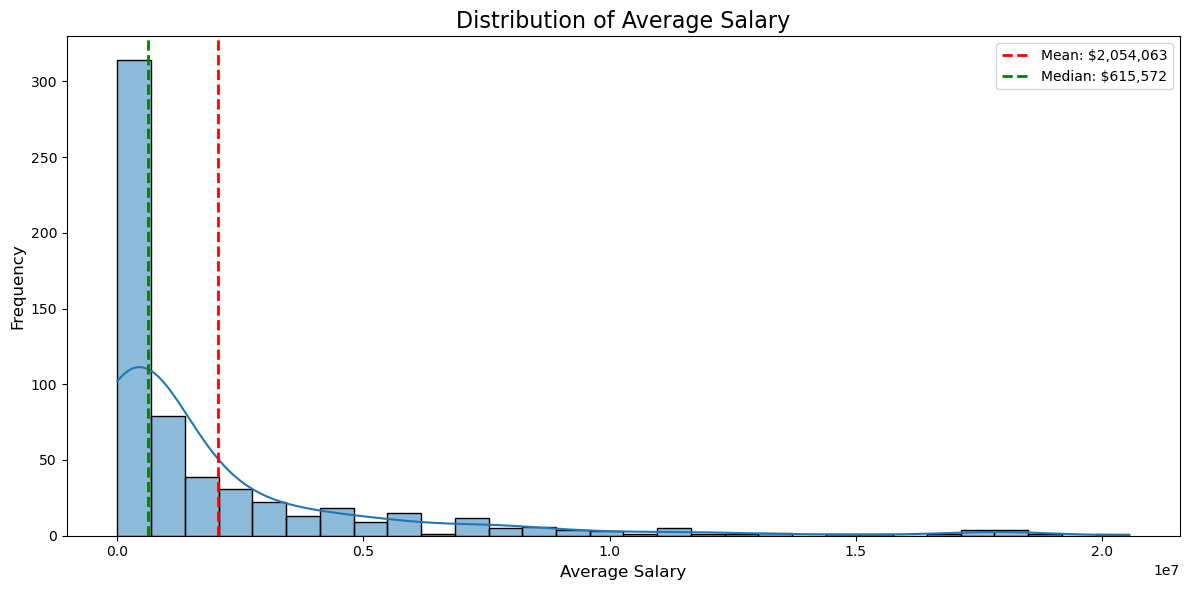

In [138]:
# Check salary distribution 

plt.figure(figsize=(12, 6))
sns.histplot(data=players_data_to_clean, x='Average Salary', kde=True, bins=30)

plt.title('Distribution of Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_salary = players_data_to_clean['Average Salary'].mean()
median_salary = players_data_to_clean['Average Salary'].median()

plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', linewidth=2, label=f'Median: ${median_salary:,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

In [144]:
# Print additional statistics
print("Average Salary Statistics:")
print(f"Mean: ${mean_salary:,.2f}")
print(f"Median: ${median_salary:,.2f}")
print(f"Standard Deviation: ${players_data_to_clean['Average Salary'].std():,.2f}")
print(f"Minimum: ${players_data_to_clean['Average Salary'].min():,.2f}")
print(f"Maximum: ${players_data_to_clean['Average Salary'].max():,.2f}")

# Check for skewness
skewness = players_data_to_clean['Average Salary'].skew()
print(f"\nSkewness: {skewness:.2f}")

if skewness > 1:
    print("The distribution is highly right-skewed.")
elif skewness > 0.5:
    print("The distribution is moderately right-skewed.")
elif skewness > -0.5:
    print("The distribution is approximately symmetric.")
elif skewness > -1:
    print("The distribution is moderately left-skewed.")
else:
    print("The distribution is highly left-skewed.")


Average Salary Statistics:
Mean: $2,054,063.34
Median: $615,572.39
Standard Deviation: $3,420,294.49
Minimum: $5,357.14
Maximum: $20,556,781.21

Skewness: 2.82
The distribution is highly right-skewed.


In [173]:
# Log Transformation
players_data_to_clean['Log_Average_Salary'] = np.log(players_data_to_clean['Average Salary'])

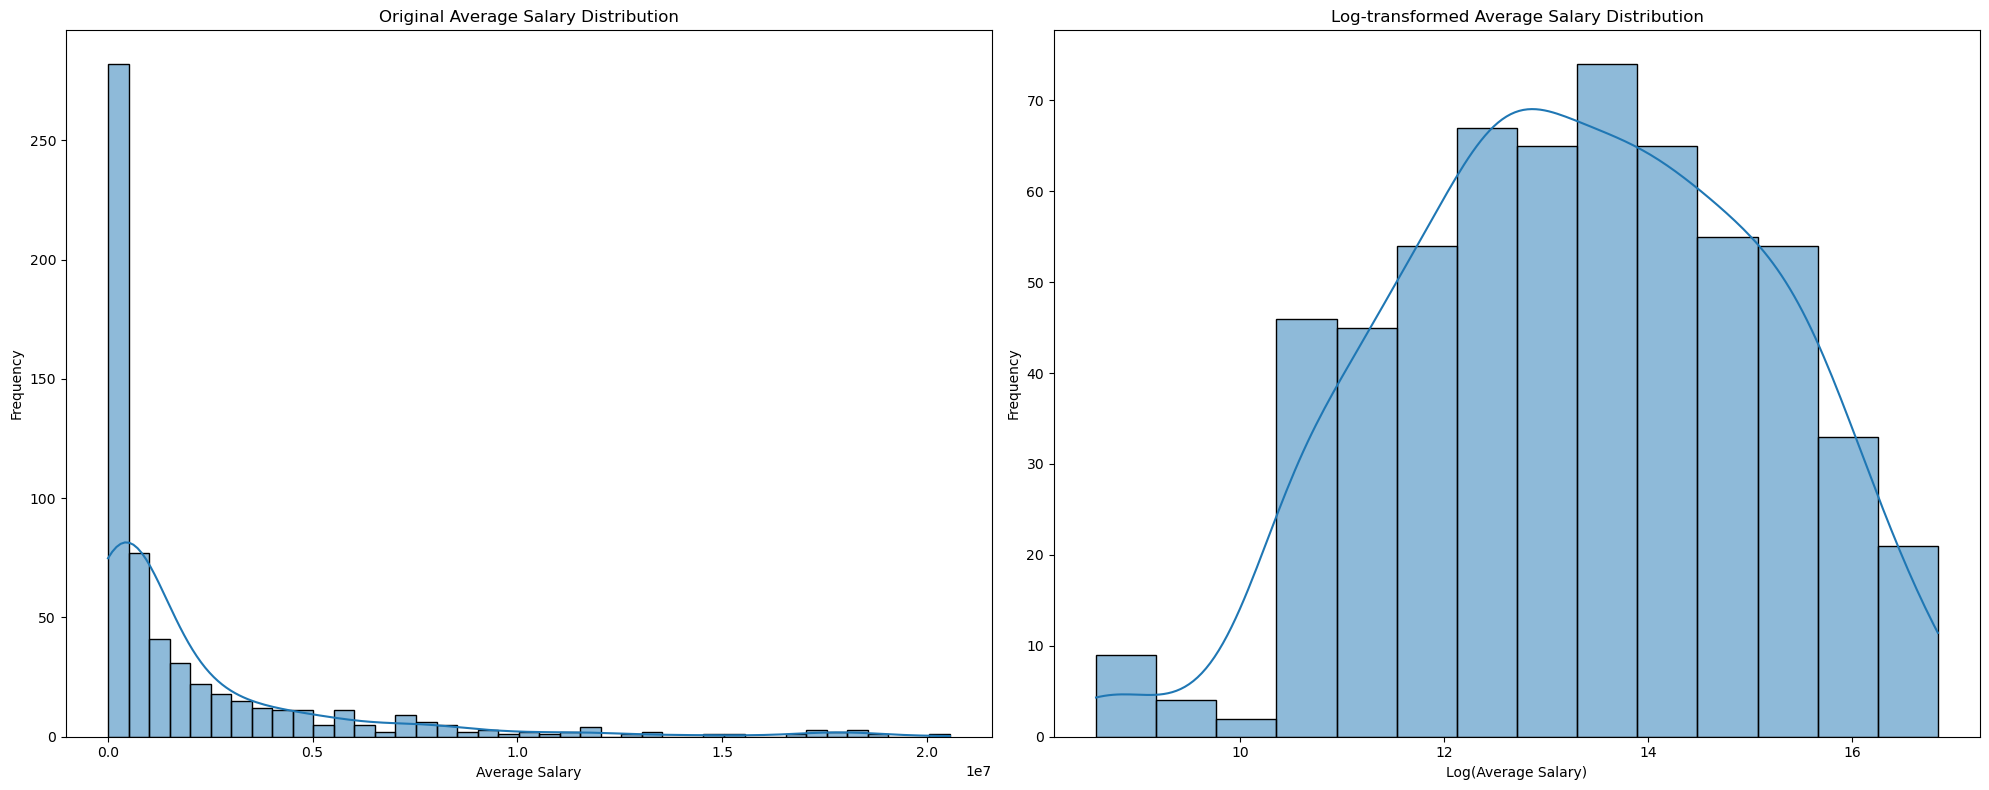

Original Average Salary Statistics:
count    5.940000e+02
mean     2.054063e+06
std      3.420294e+06
min      5.357143e+03
25%      1.725922e+05
50%      6.155724e+05
75%      2.290094e+06
max      2.055678e+07
Name: Average Salary, dtype: float64

Skewness: 2.82

Log-transformed Average Salary Statistics:
count    594.000000
mean      13.288108
std        1.753935
min        8.586186
25%       12.058687
50%       13.330297
75%       14.644103
max       16.838701
Name: Log_Average_Salary, dtype: float64

Skewness: -0.17


In [175]:
# Plot to compare 'Average Salary' and 'Log_Average_Salary'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original Distribution
sns.histplot(data=players_data_to_clean, x='Average Salary', kde=True, ax=ax1)
ax1.set_title('Original Average Salary Distribution')
ax1.set_xlabel('Average Salary')
ax1.set_ylabel('Frequency')

# Log-transformed Distribution
sns.histplot(data=players_data_to_clean, x='Log_Average_Salary', kde=True, ax=ax2)
ax2.set_title('Log-transformed Average Salary Distribution')
ax2.set_xlabel('Log(Average Salary)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print statistics for both original and transformed data
print("Original Average Salary Statistics:")
print(players_data_to_clean['Average Salary'].describe())
print(f"\nSkewness: {players_data_to_clean['Average Salary'].skew():.2f}")

print("\nLog-transformed Average Salary Statistics:")
print(players_data_to_clean['Log_Average_Salary'].describe())
print(f"\nSkewness: {players_data_to_clean['Log_Average_Salary'].skew():.2f}")


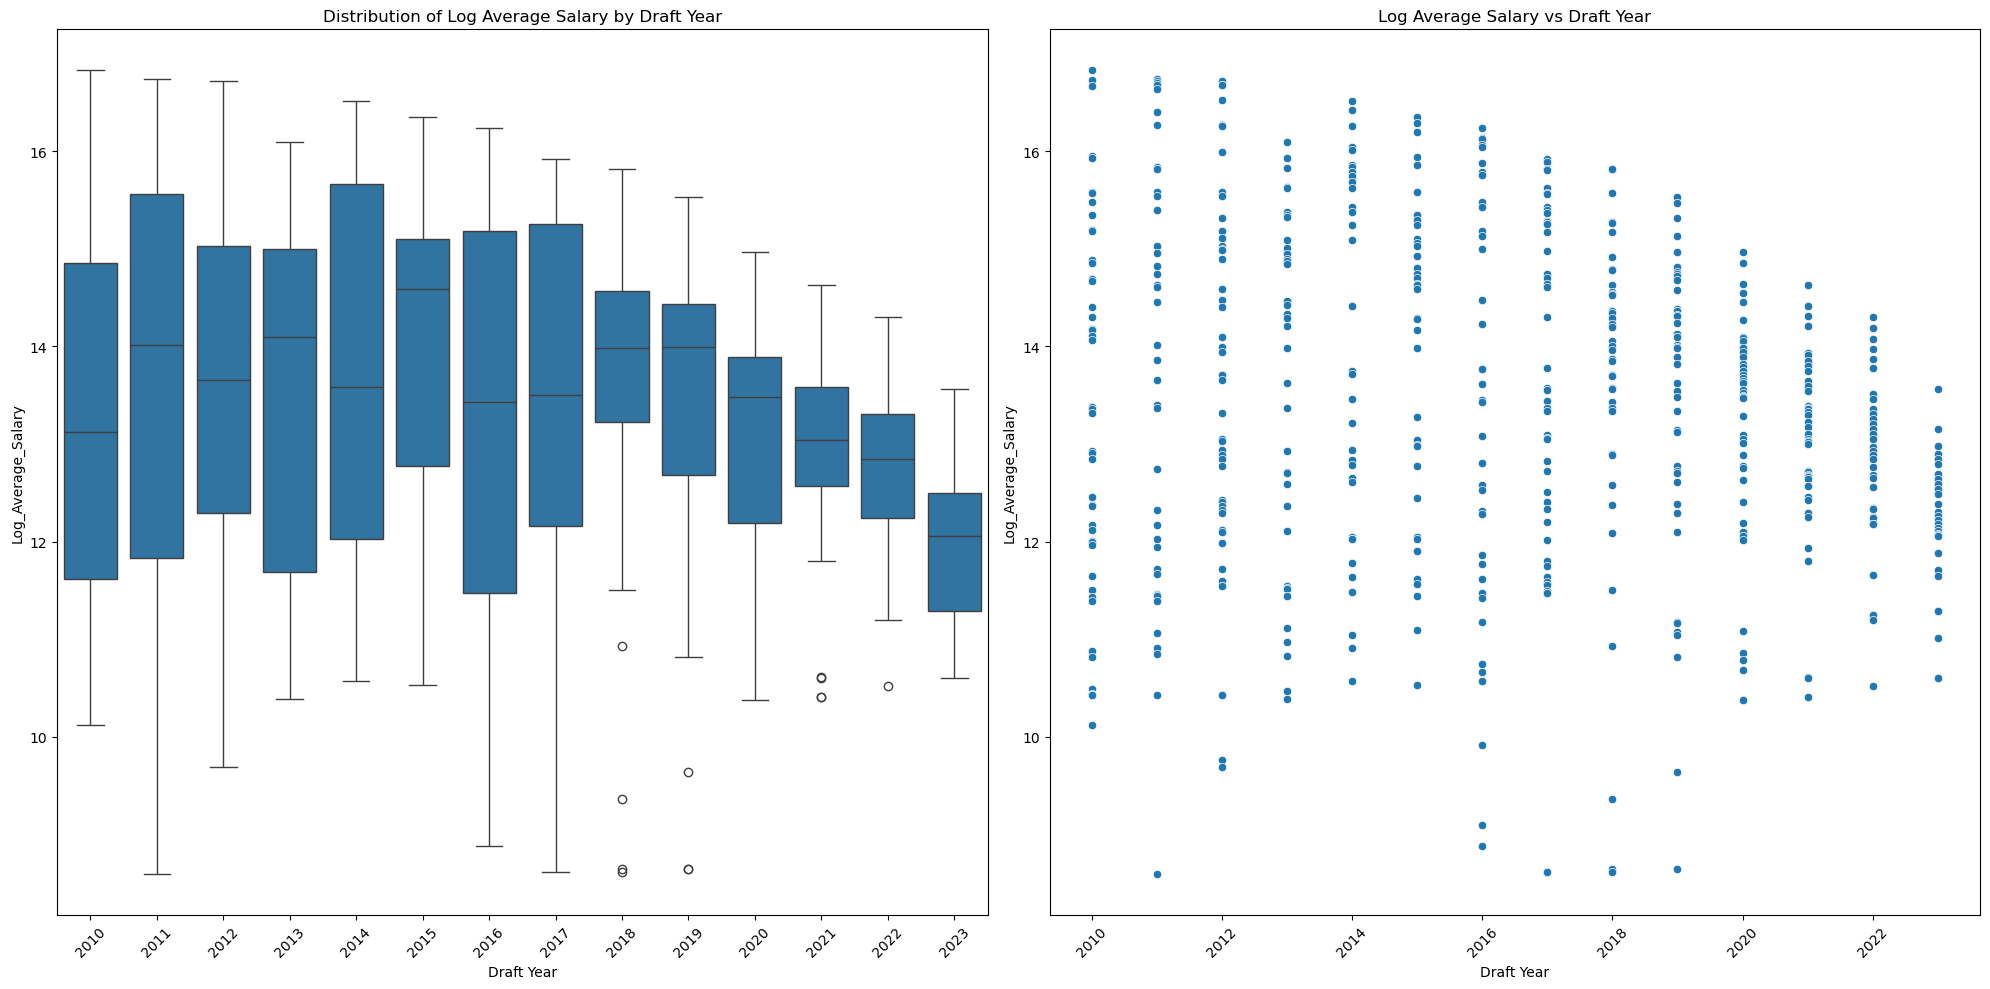

In [182]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Box Plot
sns.boxplot(x='Draft Year', y='Log_Average_Salary', data=players_data_to_clean, ax=ax1)
ax1.set_title('Distribution of Log Average Salary by Draft Year')
ax1.set_xlabel('Draft Year')
ax1.set_ylabel('Log_Average_Salary')
ax1.tick_params(axis='x', rotation=45)

# Scatter Plot
sns.scatterplot(x='Draft Year', y='Log_Average_Salary', data=players_data_to_clean, ax=ax2)
ax2.set_title('Log Average Salary vs Draft Year')
ax2.set_xlabel('Draft Year')
ax2.set_ylabel('Log_Average_Salary')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [184]:
# Correlation
correlation = players_data_to_clean['Draft Year'].corr(players_data_to_clean['Log_Average_Salary'])
print(f"Correlation between Draft Year and Average Salary: {correlation:.2f}")

Correlation between Draft Year and Average Salary: -0.20


In [186]:
# Other statistics
group_stats = players_data_to_clean.groupby('Draft Year')['Log_Average_Salary'].agg(['mean', 'median', 'std']).reset_index()
print("\nAverage Salary Statistics by Draft Year:")
print(group_stats)


Average Salary Statistics by Draft Year:
    Draft Year       mean     median       std
0         2010  13.247497  13.122621  1.969919
1         2011  13.767623  14.017602  2.145454
2         2012  13.558760  13.660895  1.920041
3         2013  13.531210  14.096439  1.783971
4         2014  13.728650  13.587863  1.908764
5         2015  13.967642  14.587193  1.632402
6         2016  13.186474  13.428542  2.161785
7         2017  13.530360  13.499740  1.842160
8         2018  13.585223  13.985605  1.739125
9         2019  13.371893  13.989921  1.680335
10        2020  13.026211  13.480775  1.272534
11        2021  12.912888  13.042299  1.025861
12        2022  12.737909  12.845457  0.914103
13        2023  11.825145  12.061123  0.852251


#### Corelation between "Average Salary" and "Draft Year"
- bellow plot is done before applying log transformation. It would be better to apply Log tranfo

In [272]:
# Calculate correlations
corr_original = players_data_to_clean['Draft Year'].corr(players_data_to_clean['Average Salary'])
corr_log = players_data_to_clean['Draft Year'].corr(players_data_to_clean['Log_Average_Salary'])

print(f"Correlation with original Average Salary: {corr_original:.4f}")
print(f"Correlation with Log_Average_Salary: {corr_log:.4f}")

Correlation with original Average Salary: -0.3064
Correlation with Log_Average_Salary: -0.2106


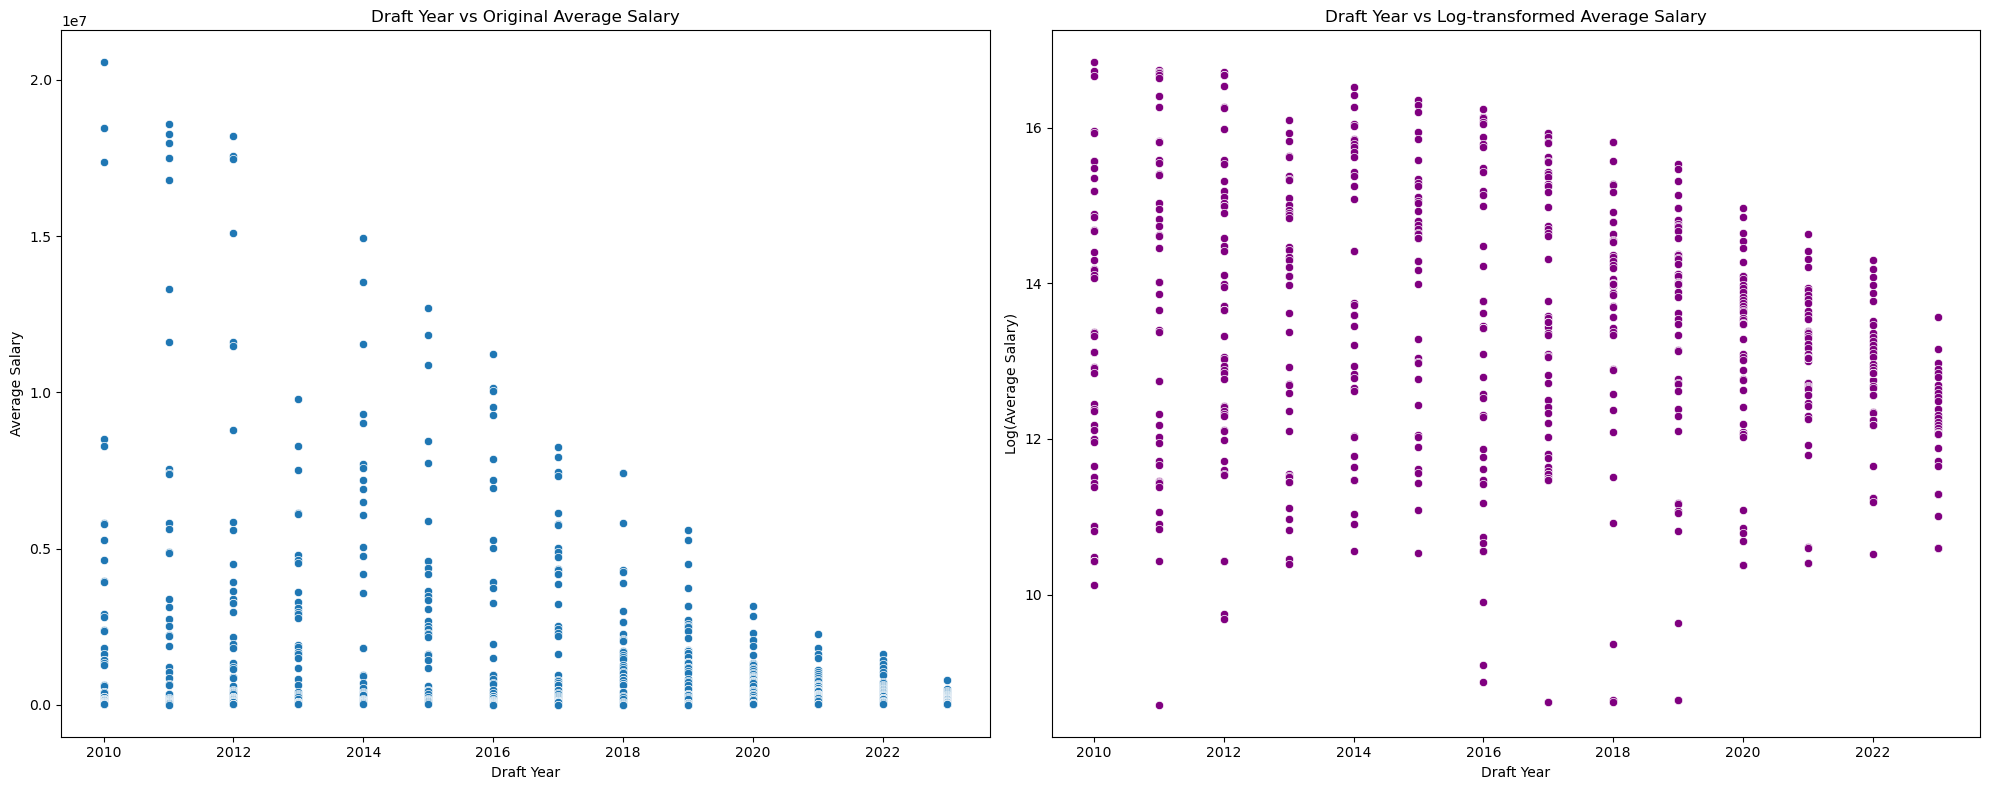

In [278]:
# Plots for Average Salary and Log Average Salary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original Salary
sns.scatterplot(x='Draft Year', y='Average Salary', data=players_data_to_clean, ax=ax1)
ax1.set_title('Draft Year vs Original Average Salary')
ax1.set_ylabel('Average Salary')

# Log-transformed Salary
sns.scatterplot(x='Draft Year', y='Log_Average_Salary', data=players_data_to_clean, ax=ax2, color='purple')
ax2.set_title('Draft Year vs Log-transformed Average Salary')
ax2.set_ylabel('Log(Average Salary)')

plt.tight_layout()
plt.show()

In [216]:
# had some issues with imputing bellow, colums and indexes so had to reset_index and delete duplicate columns
# that I created somehow
players_data_to_clean = players_data_to_clean.reset_index(drop=True)


In [218]:
# Finally we can impute our NaN values for Average Salary
# Create Log_Average_Salary column (if it doesn't exist already)

if 'Log_Average_Salary' not in players_data_to_clean.columns:
    players_data_to_clean['Log_Average_Salary'] = np.log(players_data_to_clean['Average Salary'])

# Check for missing values
missing_salary = players_data_to_clean['Log_Average_Salary'].isnull().sum()
print(f"Number of missing values in Log_Average_Salary: {missing_salary}")

Number of missing values in Log_Average_Salary: 0


In [220]:
# Imputation function -> come back to write function description
def impute_salary(group):
    ```
    ```
    group['Log_Average_Salary'] = group['Log_Average_Salary'].fillna(group['Log_Average_Salary'].median())
    return group

In [280]:
# Apply imputation
players_data_to_clean = players_data_to_clean.groupby('Draft Year', group_keys=False).apply(impute_salary)

# Impute remaining NaNs with overall median
overall_median_log_salary = players_data_to_clean['Log_Average_Salary'].median()
players_data_to_clean['Log_Average_Salary'] = players_data_to_clean['Log_Average_Salary'].fillna(overall_median_log_salary)


/var/folders/qq/dd69bmtd1cqbssx3mj0r8xjh0000gn/T/ipykernel_69961/1760288478.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_data_to_clean = players_data_to_clean.groupby('Draft Year', group_keys=False).apply(impute_salary)


In [282]:
# Verify imputation
remaining_missing = players_data_to_clean['Log_Average_Salary'].isnull().sum()
print(f"Remaining missing values in Log_Average_Salary: {remaining_missing}")

Remaining missing values in Log_Average_Salary: 0


In [286]:
# Display statistics
print("\nLog_Average_Salary statistics after imputation:")
print(players_data_to_clean['Log_Average_Salary'].describe())

# Display imputed players
imputed_players = players_data_to_clean[players_data_to_clean['Log_Average_Salary'] == players_data_to_clean['Log_Average_Salary'].round(6)]
print("\nPlayers with imputed log salaries:")
print(imputed_players[['Player', 'Draft Year', 'Log_Average_Salary']])



Log_Average_Salary statistics after imputation:
count    674.000000
mean      13.321608
std        1.664708
min        8.586186
25%       12.176101
50%       13.413722
75%       14.552426
max       16.838701
Name: Log_Average_Salary, dtype: float64

Players with imputed log salaries:
Empty DataFrame
Columns: [Player, Draft Year, Log_Average_Salary]
Index: []


In [288]:
players_data_to_clean.isna().sum().sum()

2318

In [290]:
# Calculate correlation
corr_log = players_data_to_clean['Draft Year'].corr(players_data_to_clean['Log_Average_Salary'])
print(f"Correlation between Draft Year and Log_Average_Salary: {corr_log:.4f}")

Correlation between Draft Year and Log_Average_Salary: -0.2106


In [292]:
# Perform statistical test for correlation
correlation_coefficient, p_value = stats.pearsonr(players_data_to_clean['Draft Year'], players_data_to_clean['Log_Average_Salary'])

print(f"Pearson correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value for correlation: {p_value: .4f}")


Pearson correlation coefficient: -0.2106
P-value for correlation:  0.0000


In [294]:
# Linear Regression 
X = players_data_to_clean['Draft Year'].values.reshape(-1, 1)
y = players_data_to_clean['Log_Average_Salary'].values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

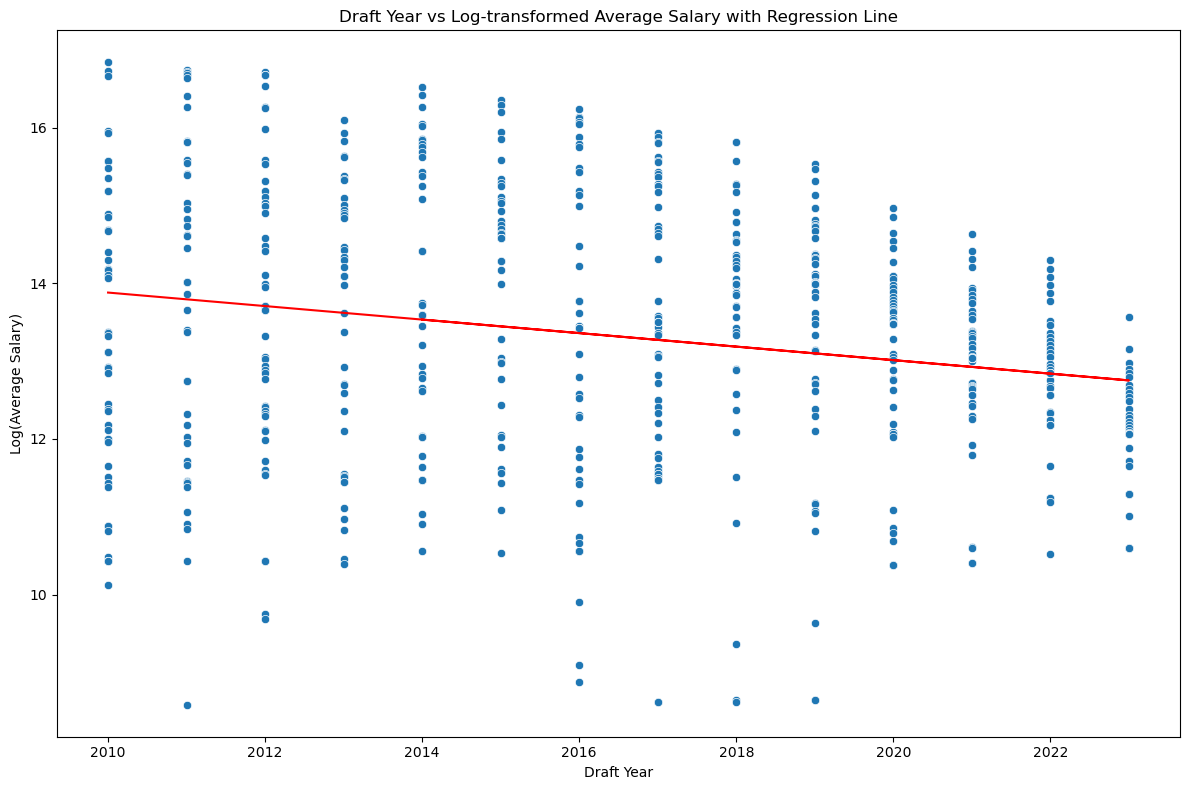

In [266]:
# Plot for linear regression
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Draft Year', y='Log_Average_Salary', data=players_data_to_clean)
plt.plot(players_data_to_clean['Draft Year'], model.predict(X), color='red')
plt.title('Draft Year vs Log-transformed Average Salary with Regression Line')
plt.xlabel('Draft Year')
plt.ylabel('Log(Average Salary)')
plt.tight_layout()
plt.show()


In [296]:
# R-squared
r_squared = r2_score(y, model.predict(X))

print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")

Slope (coefficient): -0.0868
Intercept: 188.4235
R-squared: 0.0444


In [298]:
# Statistics by Draft Year
group_stats = players_data_to_clean.groupby('Draft Year')['Log_Average_Salary'].agg(['mean', 'median', 'std']).reset_index()
print("\nLog_Average_Salary Statistics by Draft Year:")
print(group_stats)


Log_Average_Salary Statistics by Draft Year:
    Draft Year       mean     median       std
0         2010  13.235716  13.122621  1.873181
1         2011  13.788897  14.017602  2.051265
2         2012  13.562765  13.660895  1.881355
3         2013  13.629511  14.096439  1.632080
4         2014  13.704165  13.587863  1.731641
5         2015  14.088859  14.587193  1.481060
6         2016  13.202979  13.428542  2.085924
7         2017  13.528559  13.499740  1.786055
8         2018  13.665300  13.985605  1.559959
9         2019  13.419434  13.989921  1.621643
10        2020  13.054621  13.480775  1.236263
11        2021  12.935725  13.042299  0.930292
12        2022  12.752916  12.845457  0.847135
13        2023  11.855925  12.061123  0.797461


In [300]:
players_data_to_clean.to_csv('players_stats_salary_cleaned.csv', index=False)